In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine, pdist, squareform
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics.pairwise import rbf_kernel
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('data.csv')
df = df[:300]
print("Number of data samples = {}\nNumber of columns (features) = {}".format(df.shape[0], df.shape[1]))

Number of data samples = 300
Number of columns (features) = 10


In [ ]:
print(df.head())
print(df.describe())

       cov1      cov2      cov3      cov4      cov5      cov6      cov7  \
0  0.997797  0.999888  0.215934  0.196713  0.000000  0.955616  0.998810   
1  0.994004  0.979902 -0.337135 -0.248634  0.000000  0.640812  0.553918   
2  0.947603  0.455667  0.001743  0.128610 -0.004054 -0.162069  0.960601   
3  0.396577  0.919933  0.496451  0.576824 -0.340718  0.802363  0.673710   
4  0.999893  0.327615  0.700477  0.315601  0.000000  0.300785  0.979009   

   sal_pur_rat  igst_itc_tot_itc_rat  lib_igst_itc_rat  
0    -0.032581              1.761759         -0.054329  
1    -0.032026             -0.629311         -0.053516  
2    -0.030209              1.535697         -0.054215  
3    -0.032058              0.449160         -0.054126  
4    -0.032224              1.762049         -0.054330  
             cov1        cov2        cov3        cov4        cov5        cov6  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     0.941171    0.823159    0.239328    

In [ ]:
pd.DataFrame(df.isnull().sum() / len(df) * 100).reset_index().rename(
    columns={"index": "Features", 0: "Missing %"}
)

,Features,Missing %
0,cov1,0.0
1,cov2,0.0
2,cov3,0.0
3,cov4,0.0
4,cov5,0.0
5,cov6,0.0
6,cov7,0.0
7,sal_pur_rat,0.0
8,igst_itc_tot_itc_rat,0.0
9,lib_igst_itc_rat,0.0


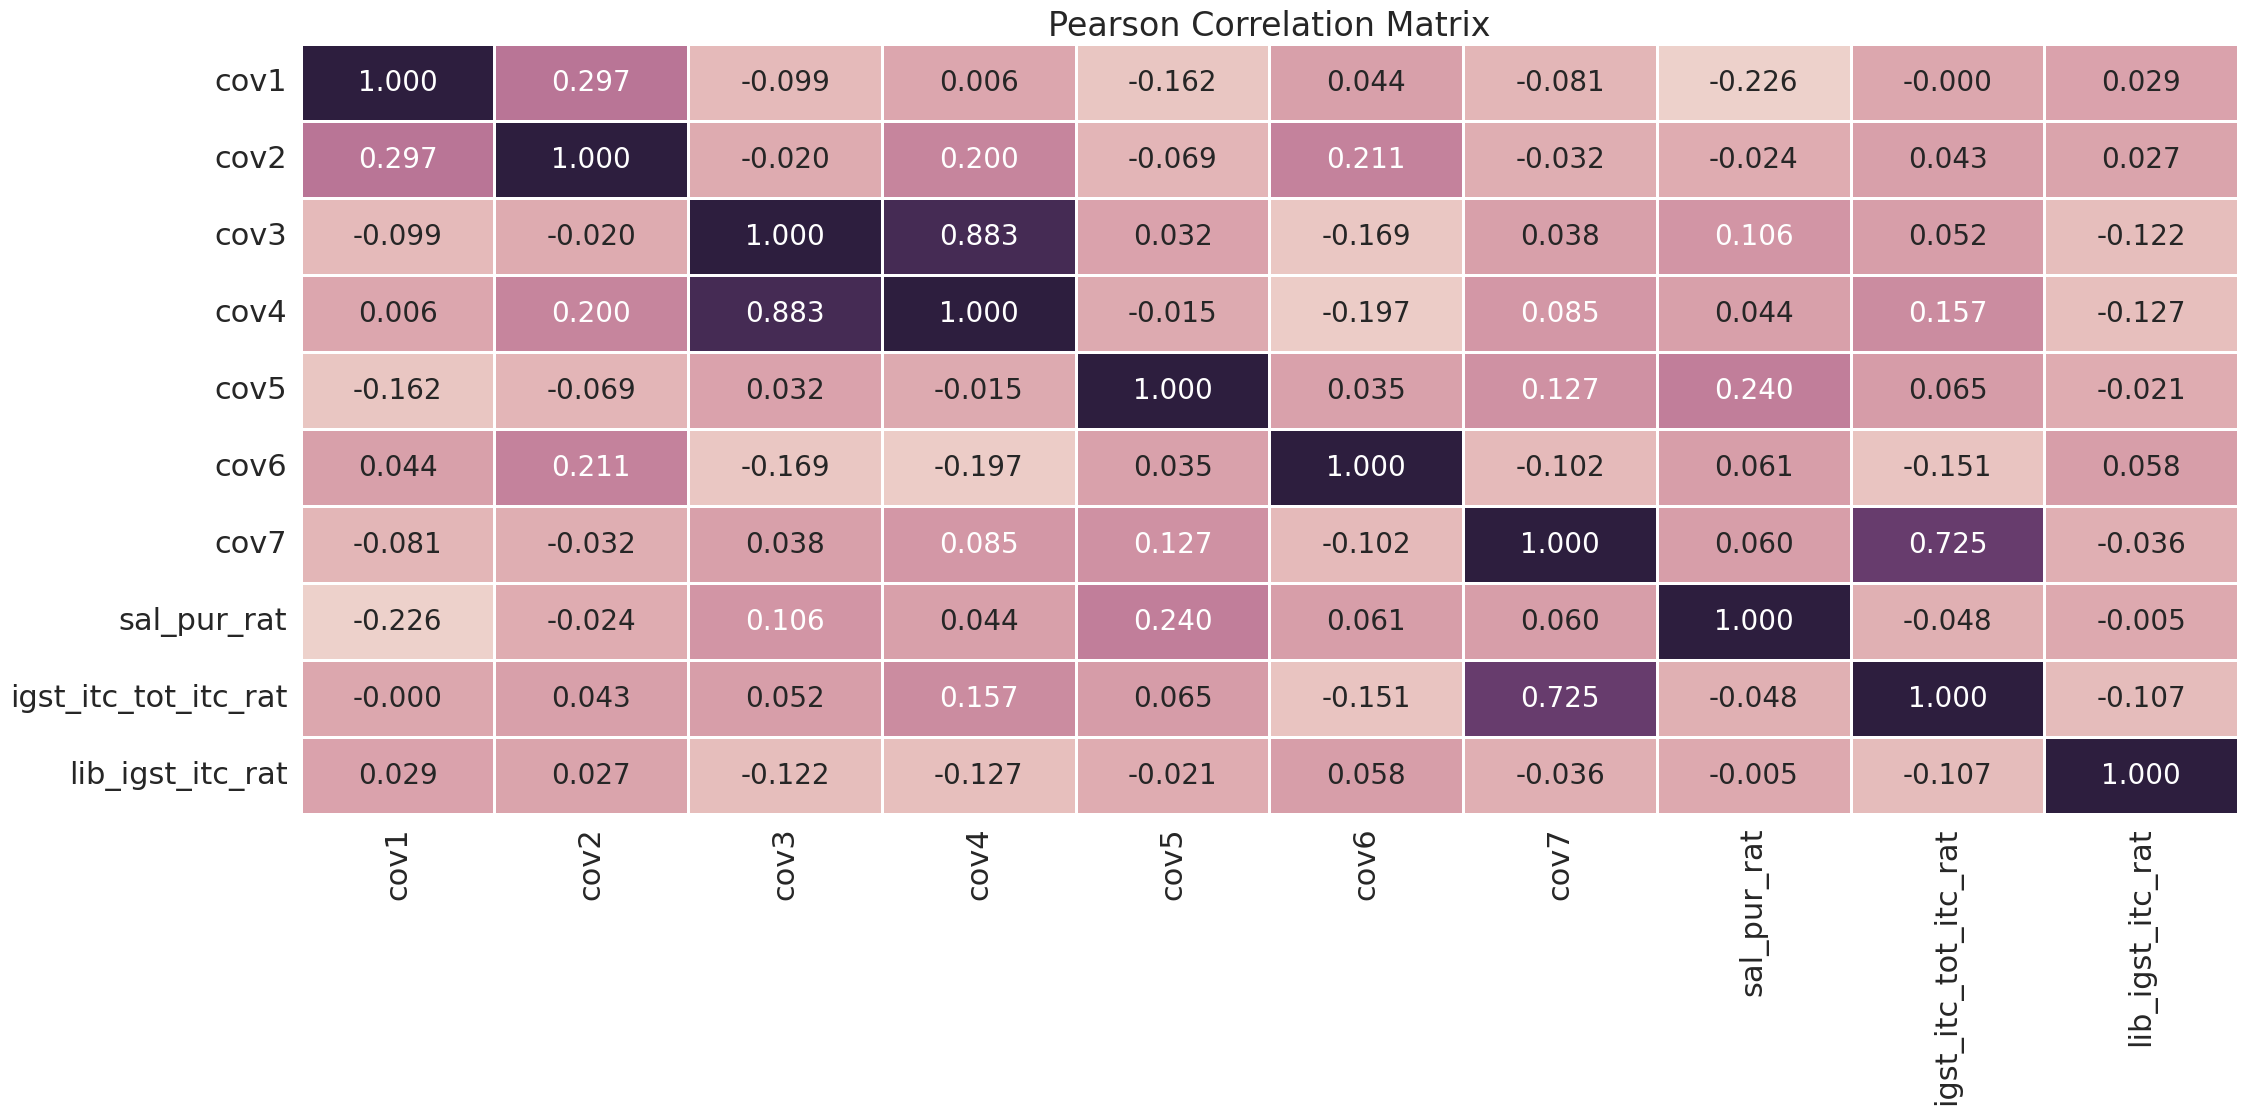

In [ ]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(25, 10))
ax = sns.heatmap(
    df.corr("pearson"),
    annot=True,
    annot_kws={"size": 20},
    fmt=".3f",
    cmap=sns.cubehelix_palette(as_cmap=True),
    linewidths=2,
    cbar=False,
)
ax.set_title("Pearson Correlation Matrix", fontsize=24)
plt.show()

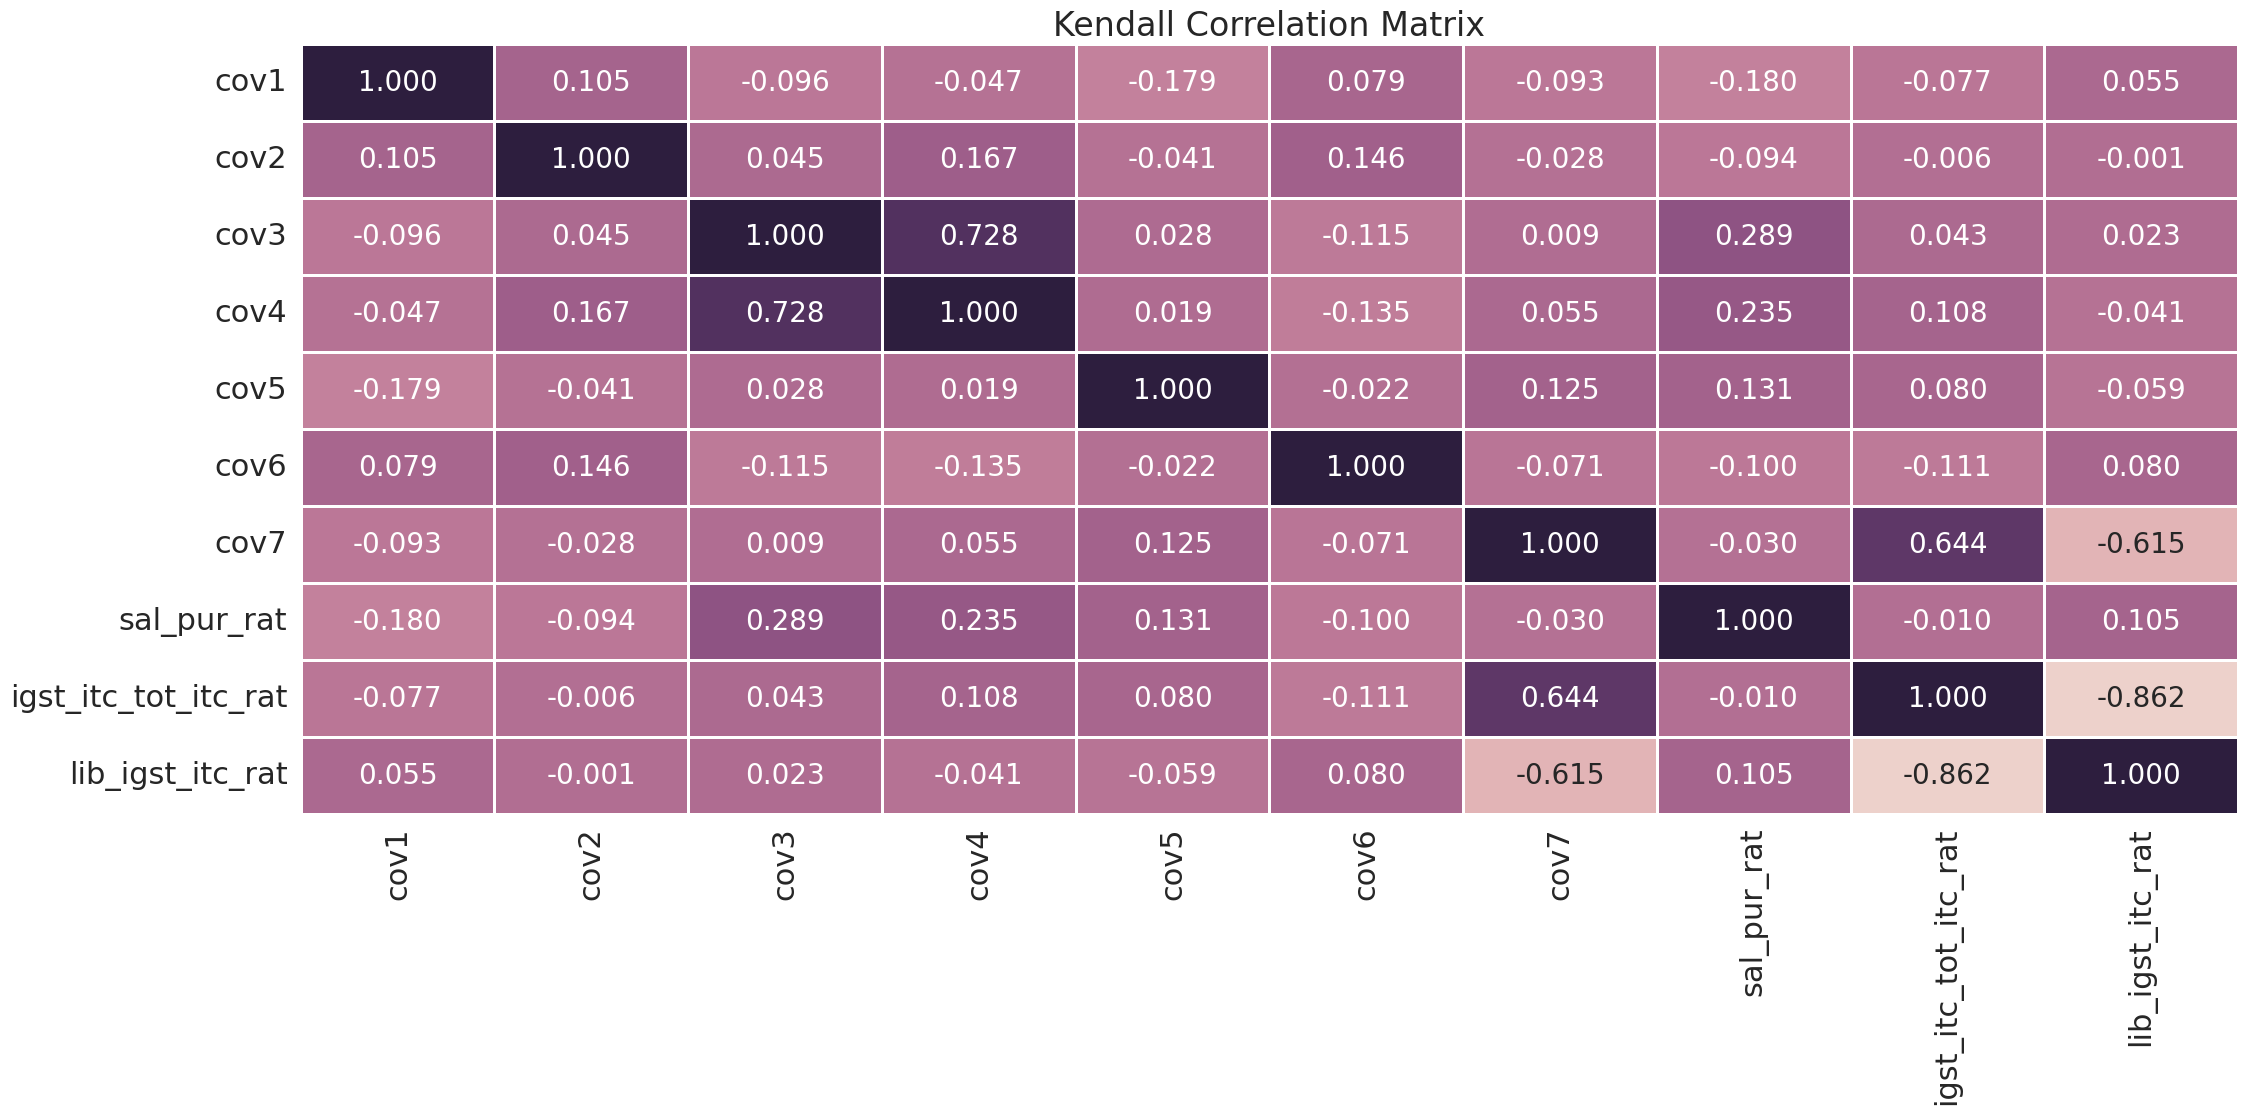

In [ ]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(25, 10))
ax = sns.heatmap(
    df.corr("kendall"),
    annot=True,
    annot_kws={"size": 20},
    fmt=".3f",
    cmap=sns.cubehelix_palette(as_cmap=True),
    linewidths=2,
    cbar=False,
)
ax.set_title("Kendall Correlation Matrix", fontsize=24)
plt.show()

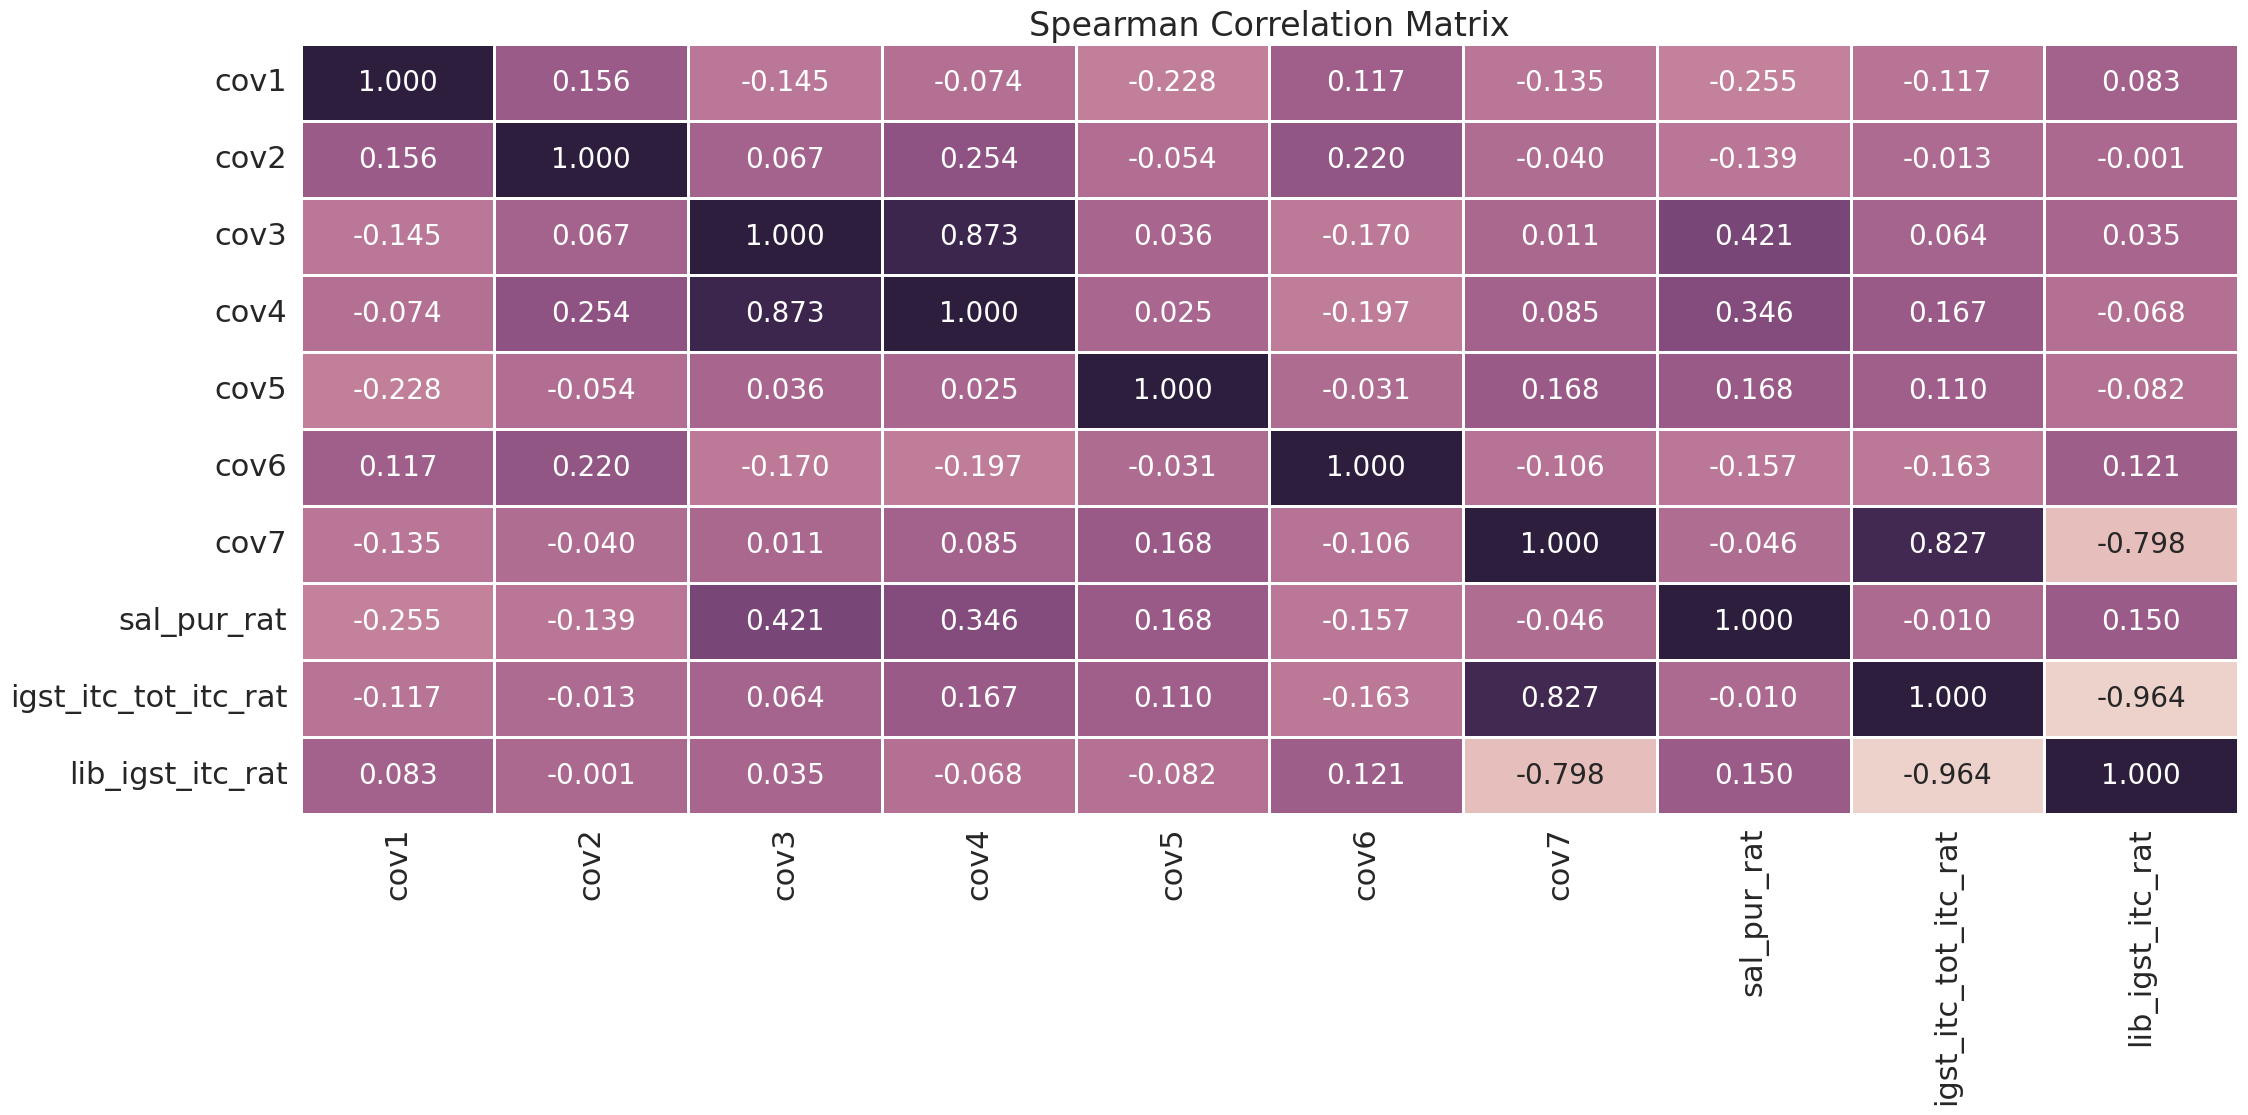

In [ ]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(25, 10))
ax = sns.heatmap(
    df.corr("spearman"),
    annot=True,
    annot_kws={"size": 20},
    fmt=".3f",
    cmap=sns.cubehelix_palette(as_cmap=True),
    linewidths=2,
    cbar=False,
)
ax.set_title("Spearman Correlation Matrix", fontsize=24)
plt.show()

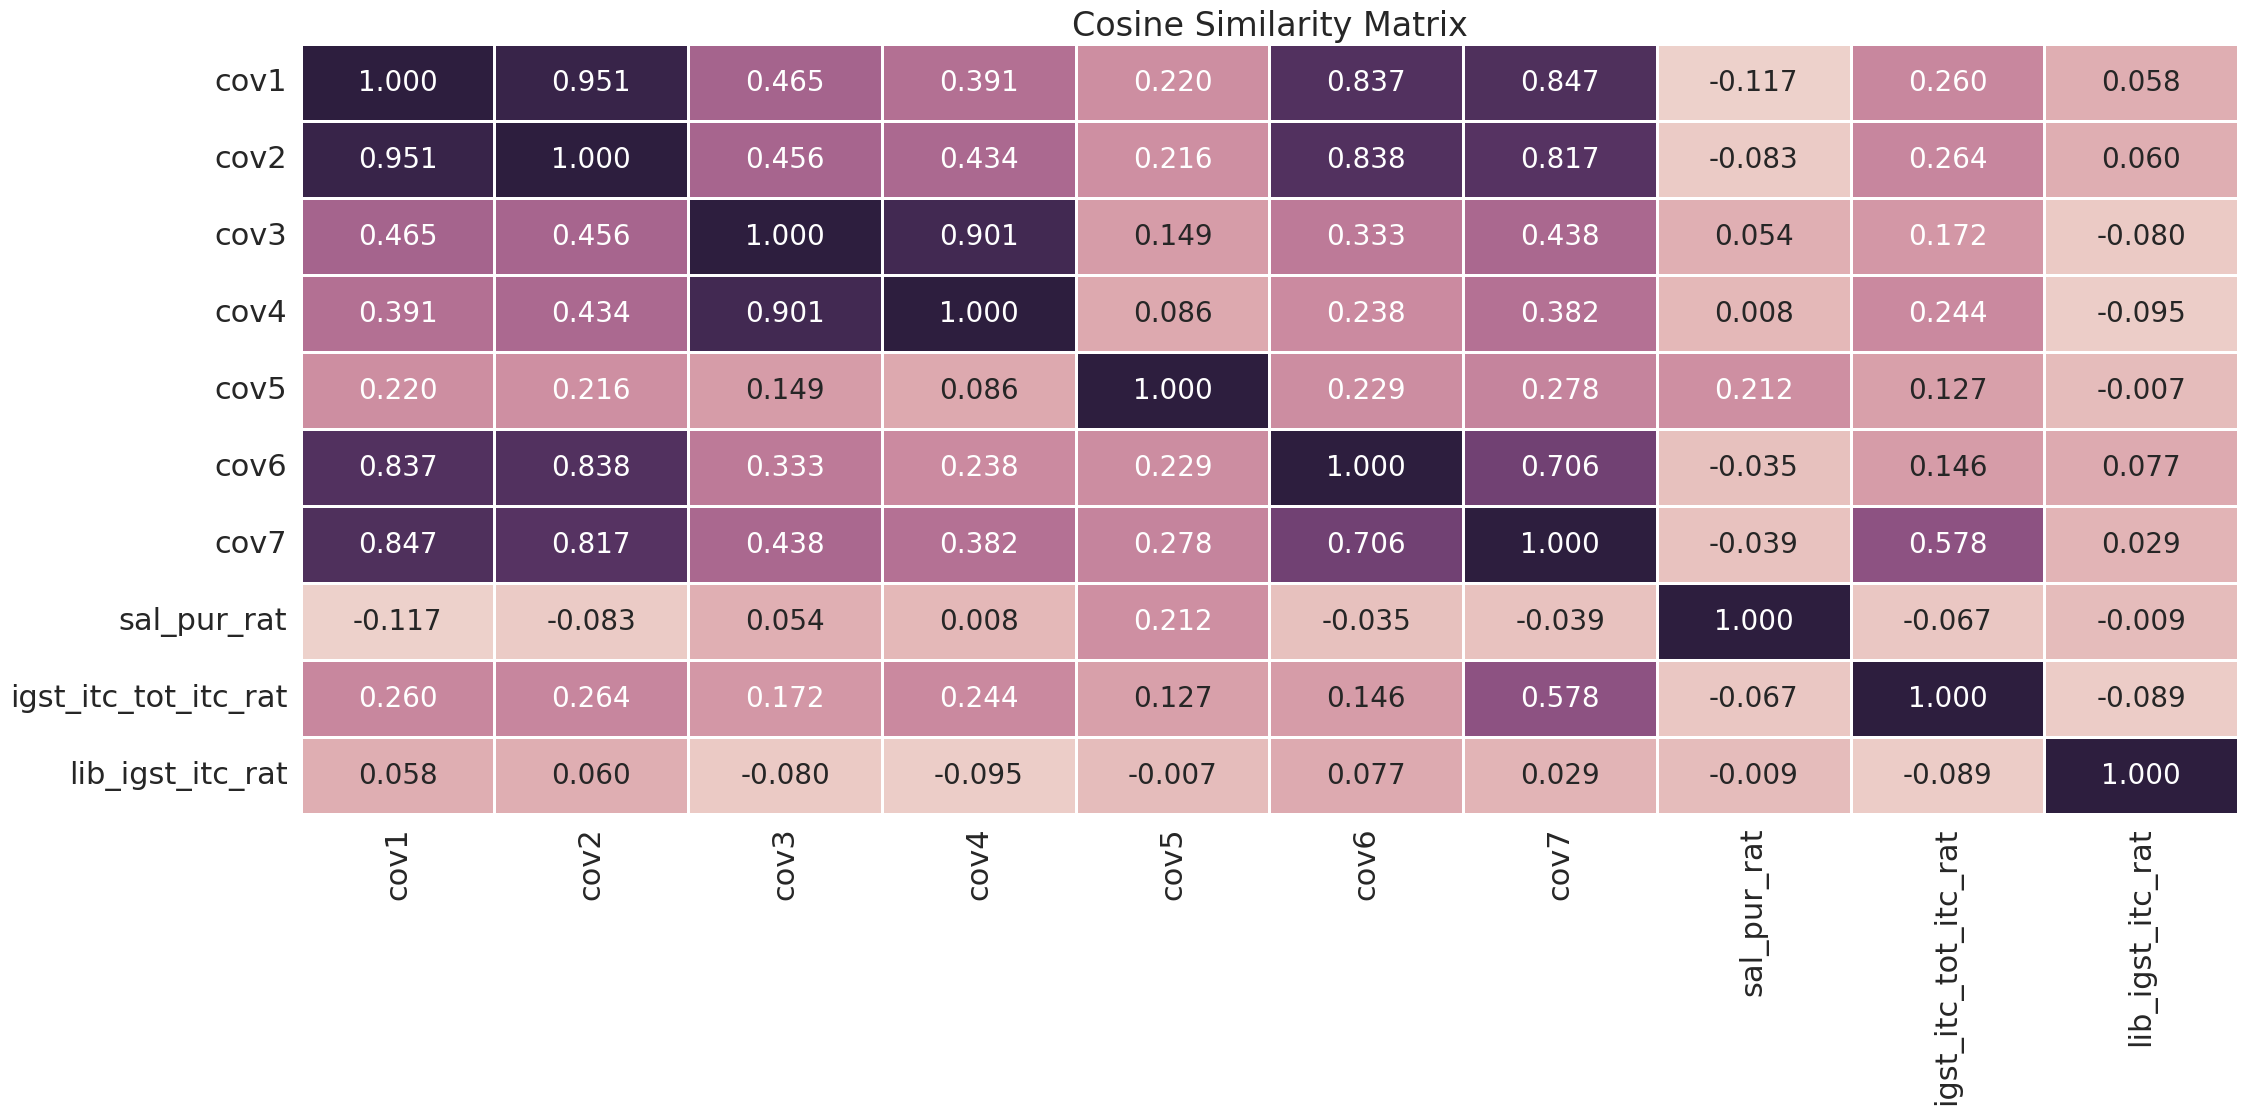

In [ ]:
cosine_sim_matrix = []
for col1 in df.columns:
    cosine_sim = []
    for col2 in df.columns:
        cosine_sim.append(1 - cosine(df[col1], df[col2]))
    cosine_sim_matrix.append(cosine_sim)

cosine_similarity_mat = pd.DataFrame(
    cosine_sim_matrix, index=df.columns, columns=df.columns
)

sns.set(font_scale=2)
fig = plt.figure(figsize=(25, 10))
ax = sns.heatmap(
    cosine_similarity_mat,
    annot=True,
    annot_kws={"size": 20},
    fmt=".3f",
    cmap=sns.cubehelix_palette(as_cmap=True),
    linewidths=2,
    cbar=False,
)
ax.set_title("Cosine Similarity Matrix", fontsize=24)
plt.show()

<ipython-input-10-a2fa84497d00>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(feature_list) // 2, 2, index)
<ipython-input-10-a2fa84497d00>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], fit=norm, kde=False, color='red')


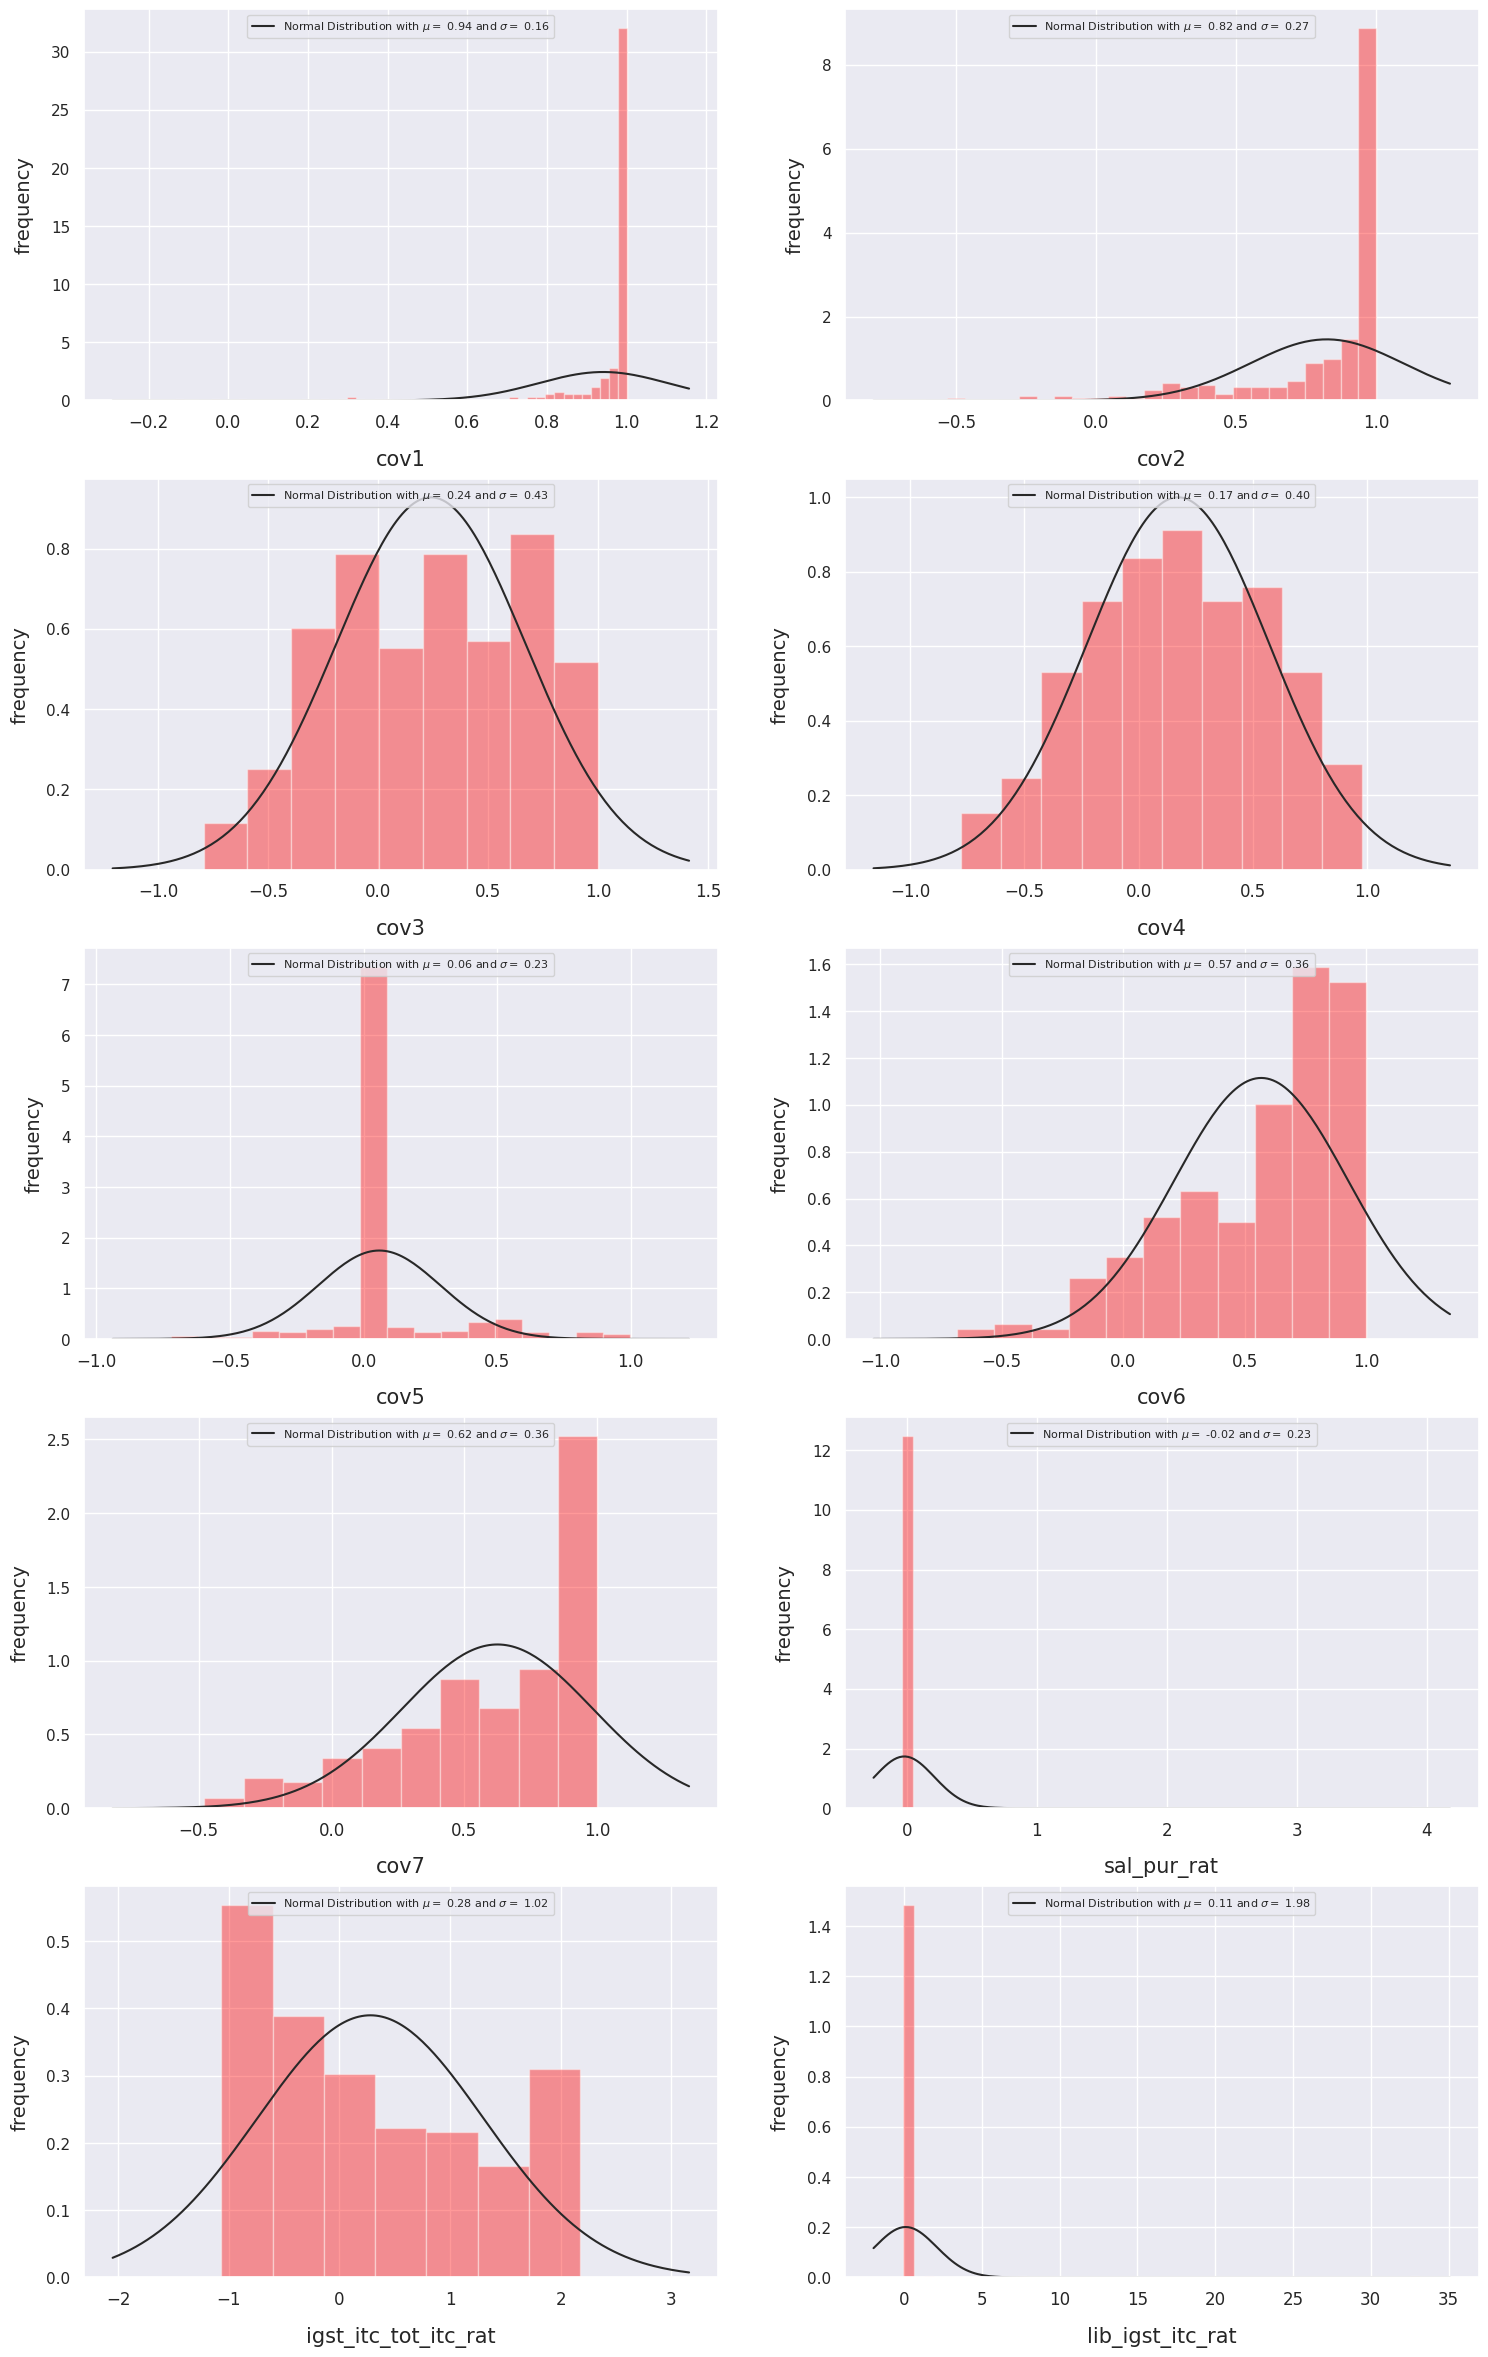

In [ ]:
fig, axs = plt.subplots(figsize=(18, 12))
plt.subplots_adjust(top=2.0)
sns.color_palette("rocket")
feature_list = df.columns.tolist()

for index, feature in enumerate(feature_list, 1):
    plt.subplot(len(feature_list) // 2, 2, index)
    sns.distplot(df[feature], fit=norm, kde=False, color='red')

    # Fitting the gaussian distribution on the data points
    (mu, sigma) = norm.fit(df[feature])

    plt.legend(
        ["Normal Distribution with $\mu=$ {:.2f} and $\sigma=$ {:.2f}".format(mu, sigma)],
        loc="upper center",
        prop={"size": 8},
    )
    plt.xlabel(f"{feature}", size=15, labelpad=12.5)
    plt.ylabel("frequency", size=14, labelpad=12.5)
    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=11)

plt.show()

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
print(principal_components.shape)

(300, 2)


In [ ]:
def neigbourhood_graph(X, k):
    dist_matrix = squareform(pdist(X, metric="euclidean"))
    A = np.ones((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(i + 1, X.shape[0]):
            if dist_matrix[i][j] > k:
                A[i][j] = 0
                A[j][i] = 0
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    return A, L
    # returns the adjacency matrix and the laplacian and the the similarity matrix

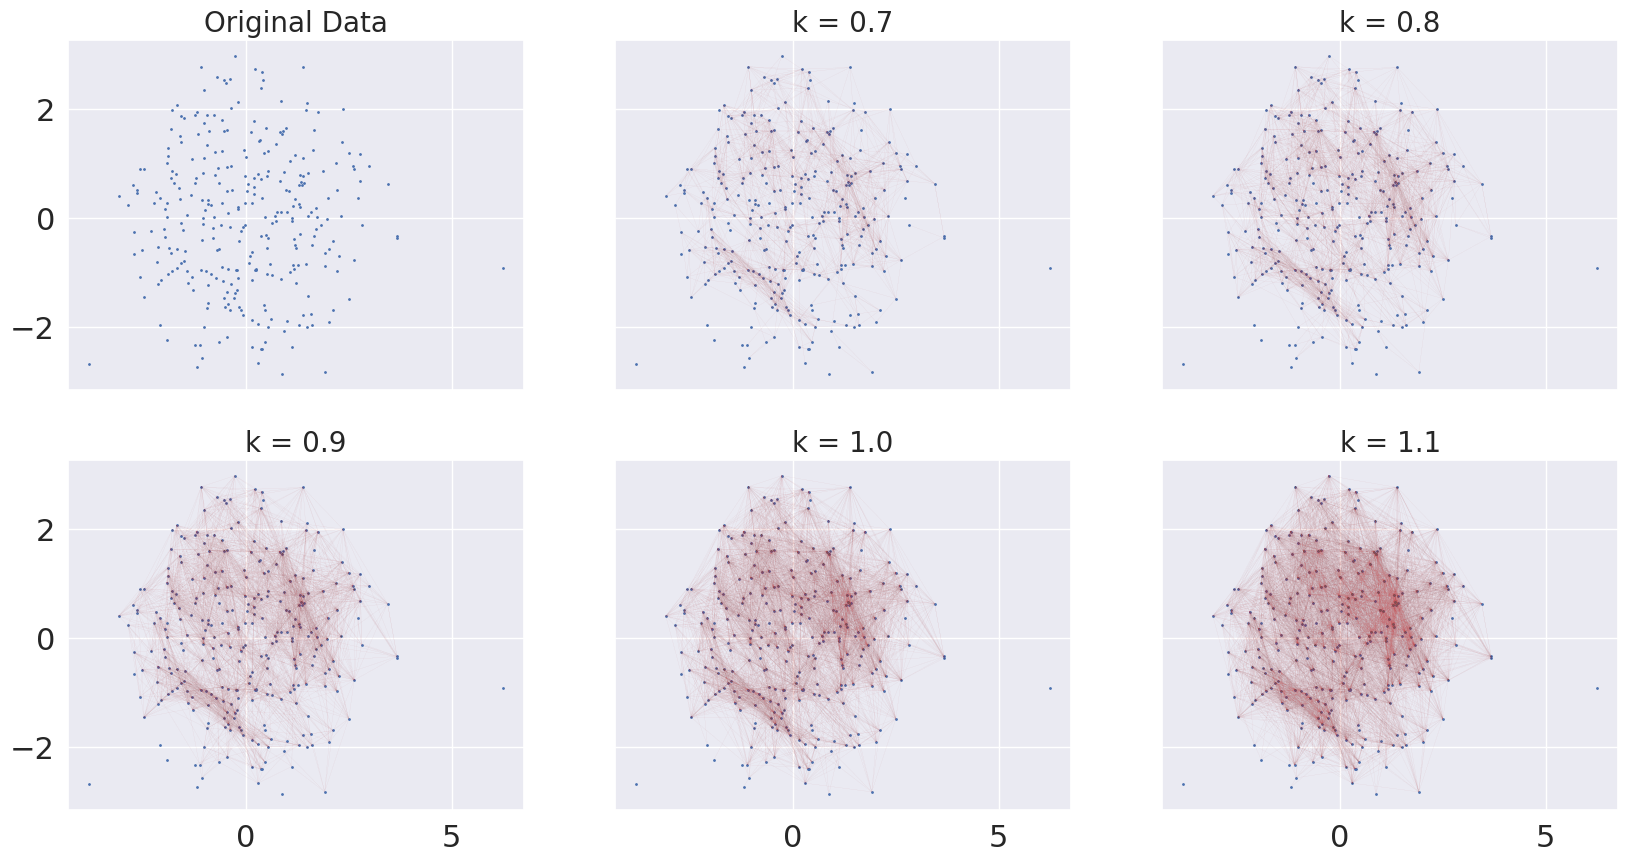

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10), sharey=True, sharex=True)

ax[0][0].scatter(principal_components[:, 0], principal_components[:, 1], s=1)
ax[0][0].set_title("Original Data", fontsize=20)

hyper_params = [0.7, 0.8, 0.9, 1.0, 1.1]
for i, alpha in enumerate(hyper_params, 1):
    A, L = neigbourhood_graph(df, alpha)
    ax[i // 3][i % 3].scatter(principal_components[:, 0], principal_components[:, 1], s=1)
    ax[i // 3][i % 3].set_title(f"k = {alpha}", fontsize=20)
    for ind1, ind2 in zip(*np.where(A == 1)):
        ax[i // 3][i % 3].plot(
            principal_components[[ind1, ind2], 0], principal_components[[ind1, ind2], 1], c="r", lw=0.1, alpha=0.1
        )
plt.show()

best_param = 1.1
# 300 points, did PCA, computed adj matrices for different distance thresholds

In [ ]:
def knn(k, df, mutual=False):
    dist_matrix = squareform(pdist(df, metric="euclidean"))
    dist_matrix = np.where(dist_matrix == 0, np.inf, dist_matrix)
    A = np.zeros((df.shape[0], df.shape[0]))
    # print(dist_matrix.shape)
    neighbours = np.argsort(dist_matrix)[:, :k]
    for i in range(df.shape[0]):
        A[i, neighbours[i]] = 1
    
    if mutual:
        A = A * A.T
    else:
        A = A + A.T - A*A.T
    
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    return A, L
    # k nearest neighbours, pass the same dataset as the previous visualization

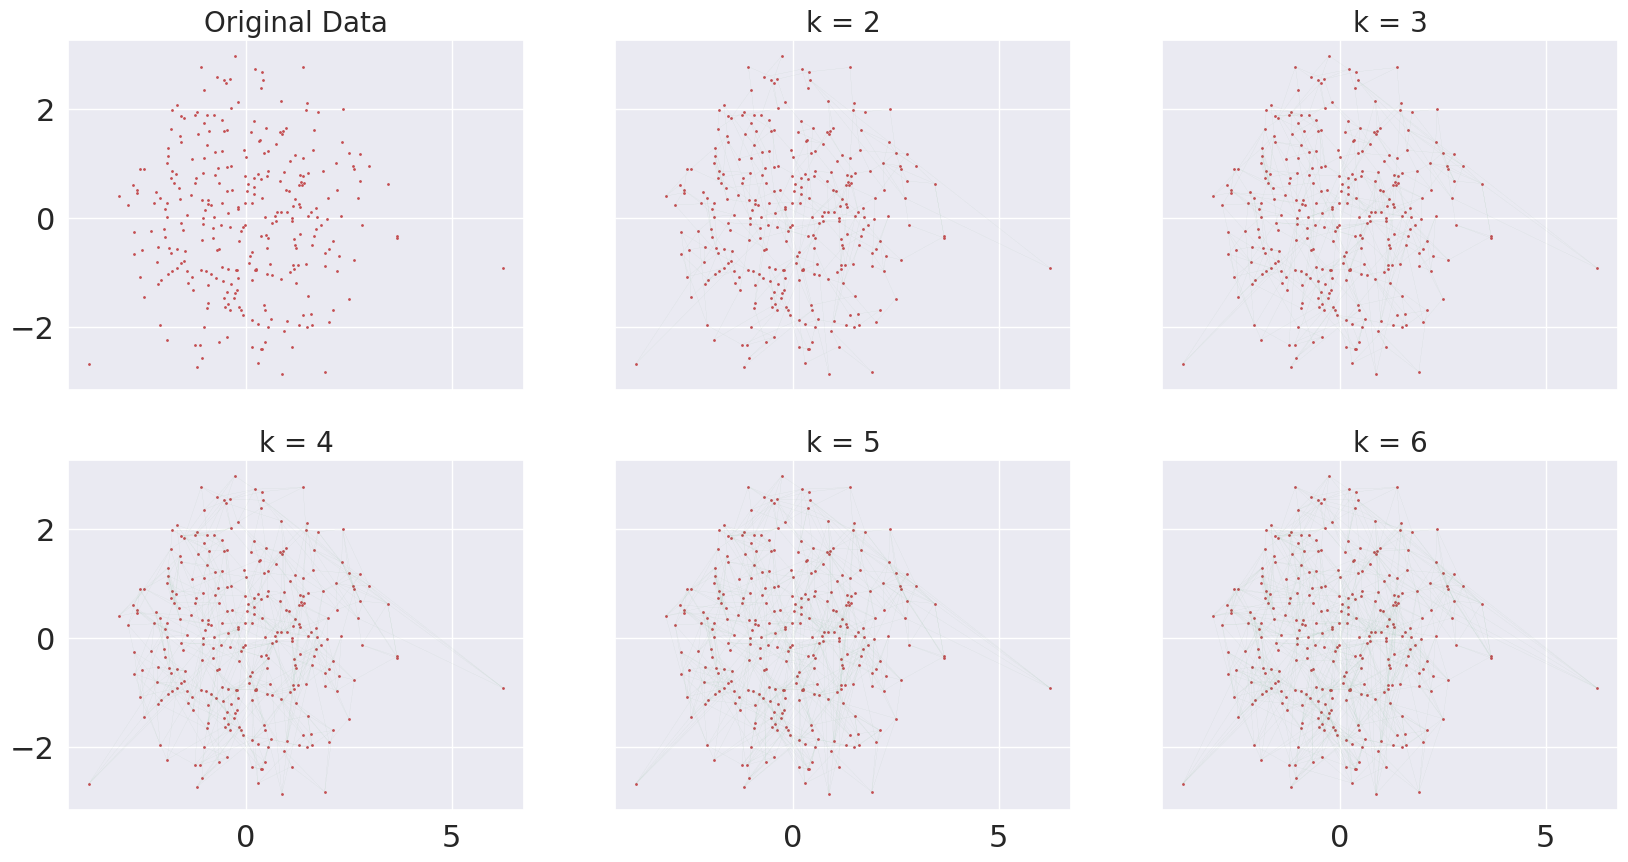

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10), sharey=True, sharex=True)

ax[0][0].scatter(principal_components[:, 0], principal_components[:, 1], s=1, c='r')
ax[0][0].set_title("Original Data", fontsize=20)

ks = list(range(2, 7))
for i, k in enumerate(ks, 1):
    A, L = knn(k, df, mutual=False)
    ax[i // 3][i % 3].scatter(principal_components[:, 0], principal_components[:, 1], s=1, c='r')
    ax[i // 3][i % 3].set_title(f"k = {k}", fontsize=20)
    for ind1, ind2 in zip(*np.where(A == 1)):
        ax[i // 3][i % 3].plot(
            principal_components[[ind1, ind2], 0], principal_components[[ind1, ind2], 1], c="g", lw=0.1, alpha=0.1
        )
plt.show()
best_k = 5

In [ ]:
def fully_connected(df, sigma=1):
    A = np.zeros((df.shape[0], df.shape[0]))
    for i in range(df.shape[0]):
        for j in range(i + 1, df.shape[0]):
            A[i][j] = np.exp(-np.linalg.norm(df.iloc[i] - df.iloc[j]) ** 2 / (2 * sigma ** 2))
            A[j][i] = A[i][j]
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    return A, L
    # edge weight alloted to each pair of nodes according to the equation

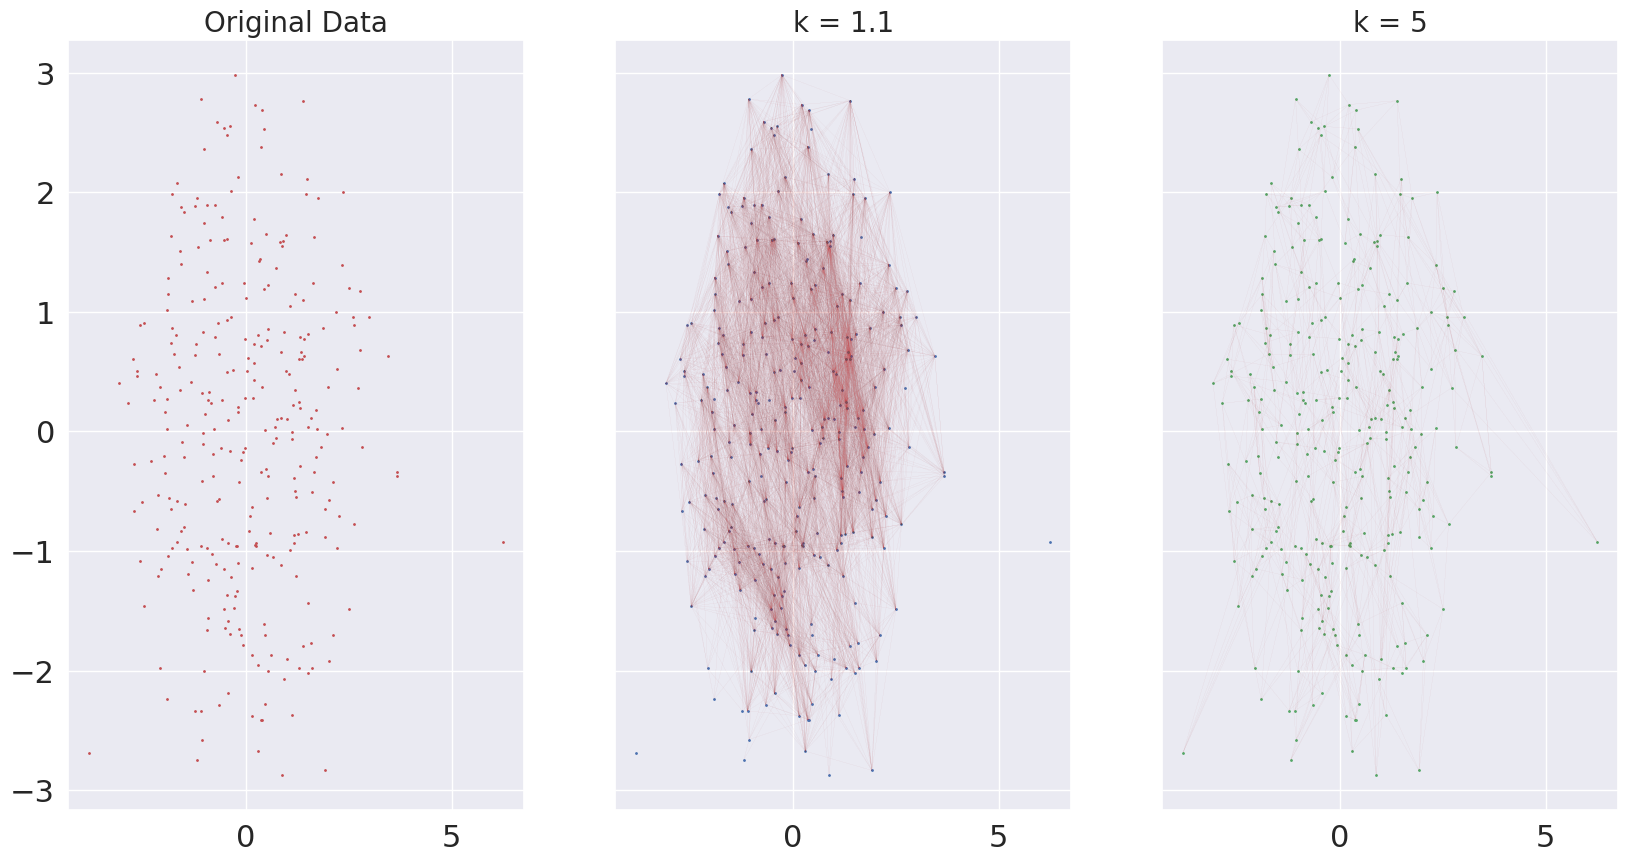

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10), sharey=True, sharex=True)
ax[0].scatter(principal_components[:, 0], principal_components[:, 1], s=1, c='r')
ax[0].set_title("Original Data", fontsize=20)

A, L = neigbourhood_graph(df, best_param)
ax[1].scatter(principal_components[:, 0], principal_components[:, 1], s=1, c='b')
ax[1].set_title(f"k = {best_param}", fontsize=20)
for ind1, ind2 in zip(*np.where(A == 1)):
    ax[1].plot(
        principal_components[[ind1, ind2], 0], principal_components[[ind1, ind2], 1], c="r", lw=0.1, alpha=0.1
    )

A, L = knn(best_k, df, mutual=False)
ax[2].scatter(principal_components[:, 0], principal_components[:, 1], s=1, c='g')
ax[2].set_title(f"k = {best_k}", fontsize=20)
for ind1, ind2 in zip(*np.where(A == 1)):
    ax[2].plot(
        principal_components[[ind1, ind2], 0], principal_components[[ind1, ind2], 1], c="r", lw=0.1, alpha=0.1
    )
plt.show()
# pass the same 300 data points to the fc function and plot

In [ ]:
def normalizeLaplacian(L, norm='sym'):
    if norm == 'rw':
        D = np.diag(np.diag(L))
        L_norm = np.linalg.inv(D) @ L
    elif norm == 'sym':
        D = np.diag(np.diag(L))
        D_sqrt = np.sqrt(np.linalg.inv(D))
        L_norm = D_sqrt @ L @ D_sqrt
    return L_norm

In [ ]:
def gen_eigenvectors(L, k):
    eigenvalues, eigenvectors = np.linalg.eigh(L)
    idx = np.argsort(eigenvalues)[:k]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

def eigengap(eigenvalues, k):
    return eigenvalues[k] - eigenvalues[k - 1]

def bestk(eigenvalues, maxk=10):
    eigengaps = [eigengap(eigenvalues, i) for i in range(2, maxk)]
    return np.argmax(eigengaps) + 2

Best k for alpha is 9
Best k for knn is 2
Best k for fully connected is 5
Best k for fully connected normalized is 3


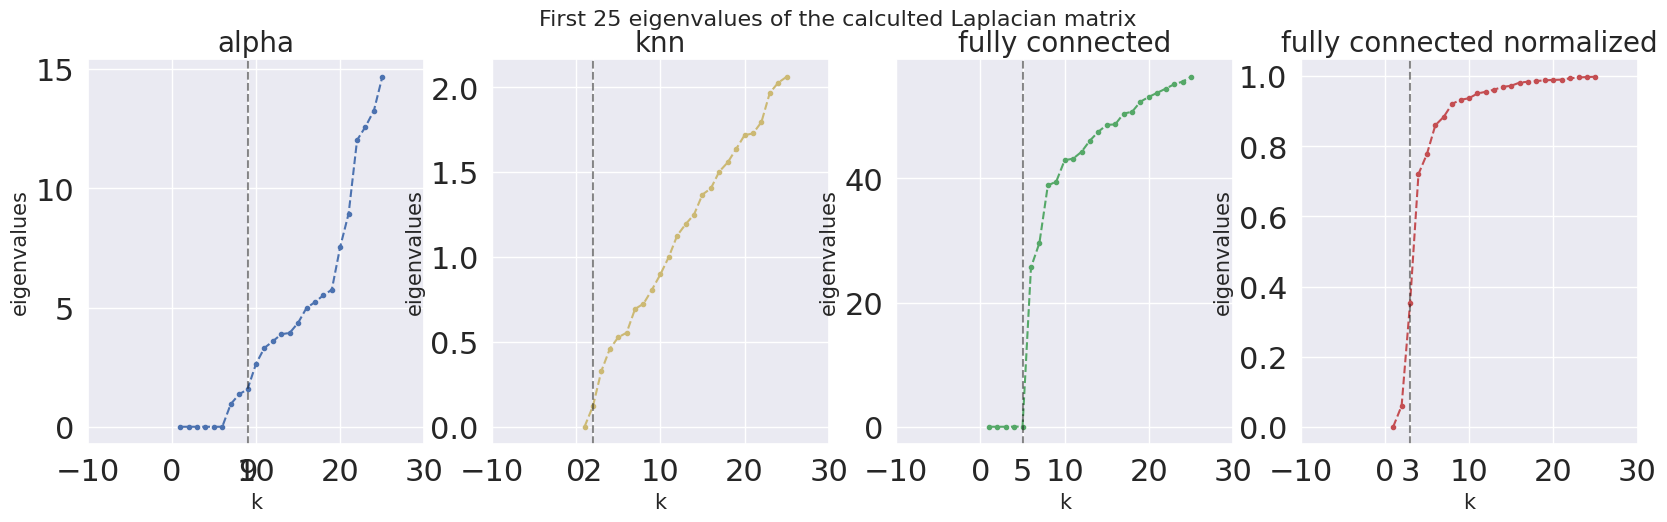

In [ ]:
A_alpha, L_alpha = neigbourhood_graph(df, best_param)
A_knn, L_knn = knn(best_k, df, mutual=False)
A_fc, L_fc = fully_connected(df, sigma=1)
A_fcnorm, L_fcnorm = A_fc, normalizeLaplacian(L_fc, norm='sym')
As = [A_alpha, A_knn, A_fc, A_fcnorm]
Ls = [L_alpha, L_knn, L_fc, L_fcnorm]
names = ["alpha", "knn", "fully connected", "fully connected normalized"]
colors = ['b', 'y', 'g', 'r']
k = 25
x_values = np.arange(1, k + 1)
best_Ks = []
eigenvectors_list = []

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, (A, L, name, color) in enumerate(zip(As, Ls, names, colors)):
    eigenvalues, eigenvectors = gen_eigenvectors(L, k)
    eigenvectors_list.append(eigenvectors)
    best_k = bestk(eigenvalues, maxk=10)
    best_Ks.append(best_k)
    print('Best k for {} is {}'.format(name, best_k))
    ax[i].plot(x_values, eigenvalues, '.', c=color)
    ax[i].plot(x_values, eigenvalues, '--', c=color)
    ax[i].axvline(x=best_k, c='k', ls='--', alpha=0.5)
    ax[i].set_title(name, fontsize=20)
    ax[i].set_xlabel('k', fontsize=15)
    ax[i].set_ylabel('eigenvalues', fontsize=15)
    ax[i].set_xticks(np.append(ax[i].get_xticks(), best_k))
fig.suptitle(f'First {k} eigenvalues of the calculted Laplacian matrix', fontsize=16)
plt.show()

In [ ]:
def spectral_clustering(eigenvectors, k, L, df):
    labels = np.zeros(df.shape[0], dtype=int)
    for ks in range(k):
        for i in range(df.shape[0]):
            if np.dot(eigenvectors[:, k], L[i]) > 0:
                labels[i] ^= 2 << k
    
    lb, cnt = np.unique(labels, return_counts=True)
    idx = np.argsort(cnt)[::-1]
    lb = lb[idx]
    cnt = cnt[idx]
    for i in range(df.shape[0]):
        labels[i] = np.argwhere(lb == labels[i])[0][0]
    
    return labels

[ 3.10309278 33.         33.         33.         33.         33.
 33.         18.         33.        ]
{0, 1, 2, 3, 4, 5, 6, 7, 8}
[23.84745763 33.        ]
{0, 1}
[ 3.10135135 33.         33.         33.         33.        ]
{0, 1, 2, 3, 4}
[ 3.33149171  3.51282051 33.        ]
{0, 1, 2}


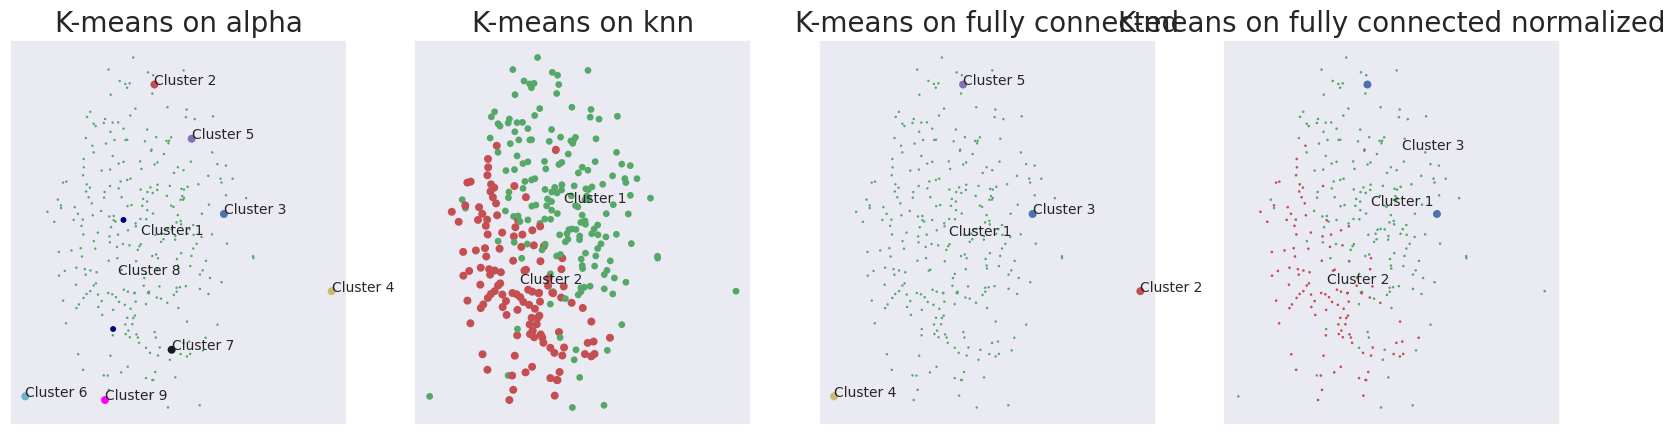

In [ ]:
from sklearn.cluster import KMeans

cs = ['g', 'r', 'b', 'y', 'm', 'c', 'k','navy','fuchsia']
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax = ax.flatten()

for i, (A, L, name, color, eigenvectors) in enumerate(zip(As, Ls, names, colors, eigenvectors_list)):
    kmeans = KMeans(n_clusters=int(best_Ks[i]), random_state=0, n_init='auto').fit(eigenvectors_list[i][:, :int(best_Ks[i])])

    labels = kmeans.labels_
    sizes = np.bincount(labels)

    sizes_i = 1 / sizes
    sizes = 3 + 30*sizes_i / max(sizes_i)
    size_of_pnt = [sizes[labels[i]] for i in range(len(labels))]
    print(sizes)
    #np.random.shuffle(cs)
    print(set(labels))
    c = [cs[labels[i]] for i in range(len((labels)))]
    ax[i].scatter(principal_components[:, 0], principal_components[:, 1], s=size_of_pnt,c=c, alpha=1, edgecolors='none', marker='o')
    ax[i].set_title("K-means on " + name, fontsize=20)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    K_ = best_Ks[i]
    for k_ in range(K_):
        ax[i].annotate('Cluster {}'.format(k_ + 1), (principal_components[labels == k_, 0].mean(), principal_components[labels == k_, 1].mean()), fontsize=10)

#ax[4].axis('off')
plt.show()